# Final Analysis - using filtered data

In [ ]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# read filtered_csv file

df = pd.read_csv('new_filtered.csv')

df.head()

,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,...,round_D,round_E,round_F,round_G,round_H,country,age,success_metric_updated,Industry,degree_category
0,13729,p:15927,Cory,Booker,Washington D.C.,#waywire,1365,Other,Political Science,Stanford University,...,0.0,0.0,0.0,0.0,0.0,United States,2,Successful,Others,Other
1,96327,p:113501,Nikita,Bier,"Los Angeles, CA",1000memories,22939,BS,Business Administration,"University of California, Berkeley",...,0.0,0.0,0.0,0.0,0.0,United States,4,Successful,Technology,Bachelors in STEM
2,120468,p:148671,Chris,Hogg,"Los Angeles, CA",100Plus,56815,Other,"Strategy, Entrepreneurship, Finance",The University of Chicago Booth School of Busi...,...,0.0,0.0,0.0,0.0,0.0,United States,3,Successful,Technology,Other
3,67275,p:75007,Vanessa,Naylon,Illinois,140 Proof,10145,Other,NaN,"University of California, Berkeley",...,0.0,0.0,0.0,0.0,0.0,United States,4,Potentially Successful,Finance and Banking,Other
4,57889,p:64707,Shane,Doyle,VA,140 Proof,9871,Other,Fox School of Business and Management,Temple University,...,0.0,0.0,0.0,0.0,0.0,United States,4,Potentially Successful,Finance and Banking,Other


In [3]:
# check columns

df.columns

Index(['id_x', 'object_id', 'first_name', 'last_name', 'birthplace',
       'affiliation_name', 'id_y', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at', 'updated_at', 'recategorized_degree_type',
       'name', 'market', 'funding_total_usd', 'status', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'country', 'age', 'success_metric_updated', 'Industry',
       'degree_category'],
      dtype='object')

In [11]:
# Replace "potentially successful" with "unsuccessful"
df['success_metric_updated'].replace('Potentially Successful', 'Unsuccessful', inplace=True)

# Filter the dataset to include all three statuses
all_statuses_startups = df[df['success_metric_updated'].isin(['Successful', 'Unsuccessful'])]


# Chi- Squared Test

In [12]:
# Create a contingency table
contingency_table = pd.crosstab(all_statuses_startups['degree_category'], all_statuses_startups['success_metric_updated'])

print("\n", contingency_table, "\n")

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

# Interpret results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between having a STEM degree and startup success.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between having a STEM degree and startup success.")


 success_metric_updated  Successful  Unsuccessful
degree_category                                 
Bachelors in STEM              446           341
Masters in STEM                145            96
Other                          690           563
PhD                             40            22 

Chi-Square Statistic: 3.9778063367776535
P-value: 0.2638706387697327
Degrees of Freedom: 3
Fail to reject the null hypothesis. There is no significant association between having a STEM degree and startup success.


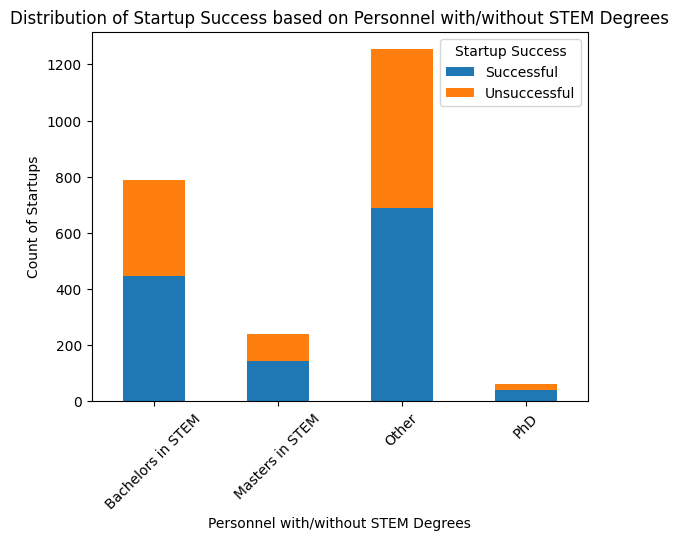

In [5]:
# Plotting the contingency table
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Startup Success based on Personnel with/without STEM Degrees')
plt.xlabel('Personnel with/without STEM Degrees')
plt.ylabel('Count of Startups')
plt.legend(title='Startup Success')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()